<h1>PAPER ROCKET</h1>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df=pd.read_csv("C:/Users/PRADEEP PRIYA/Downloads/Flight  - Sheet1.csv")


In [3]:
df.head()

,Person,Item_Identifier,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand,Distance
0,Kevin,Som,29.0,20.0,A,U,8,On,L,5
1,Kevin,kevin,23.0,16.0,B,U,8,On,L,5
2,Kevin,RR,NaN,18.0,A,L,10,On,R,6
3,Priya,Nithya,27.0,20.0,A,U,10,On,R,4
4,Priya,Priya,29.5,17.5,B,U,5,Off,R,8


In [4]:
df.columns

Index(['Person', 'Item_Identifier', 'Length', 'Breadth', 'PaperQuality',
       'Angle', 'Foldings', 'Windspeed', 'Dominanthand', 'Distance'],
      dtype='object')

<h2>CREATE COLUMN FOR DISCRETE (Y)</h2>

In [5]:
data=pd.DataFrame(df)
data["RocketDistance"]=np.where(data["Distance"]>=5,"Yes","No")
data.head()


,Person,Item_Identifier,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand,Distance,RocketDistance
0,Kevin,Som,29.0,20.0,A,U,8,On,L,5,Yes
1,Kevin,kevin,23.0,16.0,B,U,8,On,L,5,Yes
2,Kevin,RR,NaN,18.0,A,L,10,On,R,6,Yes
3,Priya,Nithya,27.0,20.0,A,U,10,On,R,4,No
4,Priya,Priya,29.5,17.5,B,U,5,Off,R,8,Yes


In [6]:
data.columns

Index(['Person', 'Item_Identifier', 'Length', 'Breadth', 'PaperQuality',
       'Angle', 'Foldings', 'Windspeed', 'Dominanthand', 'Distance',
       'RocketDistance'],
      dtype='object')

In [7]:
data.drop("Item_Identifier",axis=1,inplace=True)

In [8]:
data.head()

,Person,Length,Breadth,PaperQuality,Angle,Foldings,Windspeed,Dominanthand,Distance,RocketDistance
0,Kevin,29.0,20.0,A,U,8,On,L,5,Yes
1,Kevin,23.0,16.0,B,U,8,On,L,5,Yes
2,Kevin,NaN,18.0,A,L,10,On,R,6,Yes
3,Priya,27.0,20.0,A,U,10,On,R,4,No
4,Priya,29.5,17.5,B,U,5,Off,R,8,Yes


In [9]:
data.isnull().sum()

Person             0
Length            17
Breadth            0
PaperQuality       8
Angle              4
Foldings           0
Windspeed          0
Dominanthand       0
Distance           0
RocketDistance     0
dtype: int64

<h2>EDA</h2>

<h5>PERSON</h5>

In [10]:
data.Person.describe()

count        88
unique        4
top       Priya
freq         30
Name: Person, dtype: object

In [11]:
data.Person.isnull().sum()

0

<AxesSubplot:xlabel='Person', ylabel='count'>

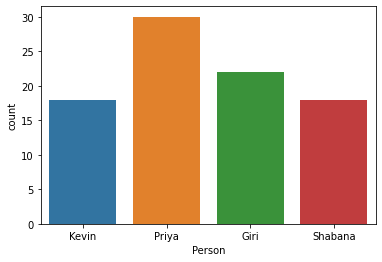

In [12]:
sns.countplot(x="Person",data=data)

<h5>LENGTH</h5>

In [13]:
data.Length.describe()

count    71.000000
mean     26.708451
std      11.920268
min       0.000000
25%      22.500000
50%      28.500000
75%      29.500000
max      98.000000
Name: Length, dtype: float64

In [14]:
data.Length.isnull().sum()

17

In [15]:
data.Length.fillna(data.Length.median(),inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x17f481c5130>,
 'caps': [<matplotlib.lines.Line2D at 0x17f481c5670>,
 'boxes': [<matplotlib.lines.Line2D at 0x17f481b4ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x17f481c5d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x17f481d1160>],
 'means': []}

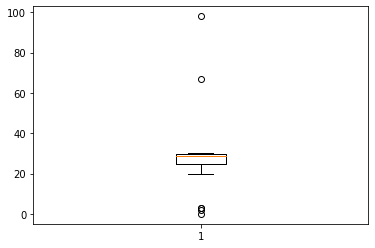

In [16]:
plt.boxplot(data.Length)

C:\Users\PRADEE~1\AppData\Local\Temp/ipykernel_13752/4072225688.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Length[data.Length>UE]=UE
C:\Users\PRADEE~1\AppData\Local\Temp/ipykernel_13752/4072225688.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Length[data.Length<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x17f48238f10>,
 'caps': [<matplotlib.lines.Line2D at 0x17f48245550>,
 'boxes': [<matplotlib.lines.Line2D at 0x17f48238b80>],
 'medians': [<matplotlib.lines.Line2D at 0x17f48245c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x17f48250040>],
 'means': []}

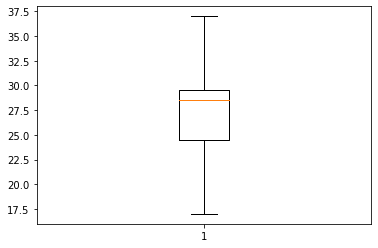

In [17]:
q3=data.Length.quantile(0.75)
q1=data.Length.quantile(0.25)
iqr=q3-q1
UE=q3+1.5*(iqr)
LE=q1-1.5*(iqr)
data[(data.Length<UE)&(data.Length>LE)]
data.Length[data.Length>UE]=UE
data.Length[data.Length<LE]=LE
plt.boxplot(data.Length)

<h5>BREADTH</h5>

In [18]:
data.Breadth.describe()

count    88.000000
mean     18.500000
std       1.339068
min      16.000000
25%      17.500000
50%      18.500000
75%      20.000000
max      20.500000
Name: Breadth, dtype: float64

In [19]:
data.Breadth.isnull().sum()


0

{'whiskers': [<matplotlib.lines.Line2D at 0x17f482b3790>,
 'caps': [<matplotlib.lines.Line2D at 0x17f482b3d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x17f482b3400>],
 'medians': [<matplotlib.lines.Line2D at 0x17f482bf4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17f482bf880>],
 'means': []}

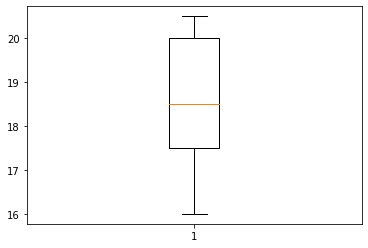

In [20]:
plt.boxplot(data.Breadth)

<h5>PAPER QUALITY</h5>

In [21]:
data.PaperQuality.describe()

count     80
unique     2
top        B
freq      47
Name: PaperQuality, dtype: object

In [22]:
data.PaperQuality.isnull().sum()

8

In [23]:
data.PaperQuality.fillna('Others',inplace=True)

<AxesSubplot:xlabel='PaperQuality', ylabel='count'>

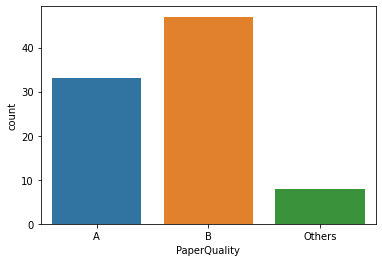

In [24]:
sns.countplot(x="PaperQuality",data=data)

<h5>ANGLE</h5>

In [25]:
data.Angle.describe()

count     84
unique     2
top        U
freq      62
Name: Angle, dtype: object

In [26]:
data.Angle.isnull().sum()

4

In [27]:
data.Angle.fillna(data.Angle.mode(),inplace=True)

<AxesSubplot:xlabel='Angle', ylabel='count'>

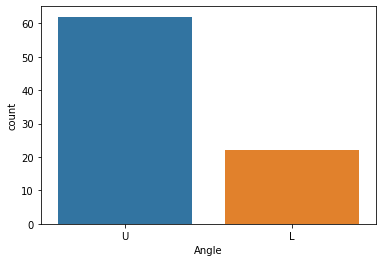

In [28]:
sns.countplot(x="Angle",data=data)

<h5>FOLDING</h5>

In [29]:
data.Foldings.describe()

count    88.000000
mean      8.136364
std       1.736570
min       5.000000
25%       8.000000
50%       8.000000
75%      10.000000
max      10.000000
Name: Foldings, dtype: float64

In [30]:
data.Foldings.isnull().sum()

0

<AxesSubplot:xlabel='Foldings', ylabel='count'>

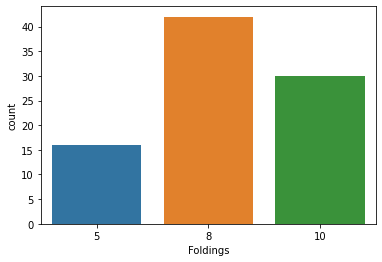

In [31]:
sns.countplot(x="Foldings",data=data)

<h5>WINDSPEED</h5>

In [32]:
data.Windspeed .describe()

count     88
unique     2
top       On
freq      44
Name: Windspeed, dtype: object

In [33]:
data.Windspeed.isnull().sum()

0

<AxesSubplot:xlabel='Windspeed', ylabel='count'>

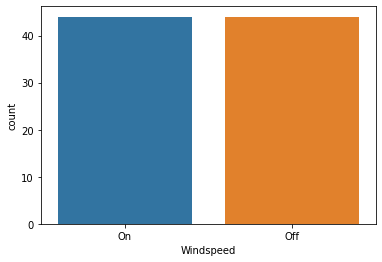

In [34]:
sns.countplot(x='Windspeed',data=data)

<h5>DOMINANT HAND</h5>

In [35]:
data.Dominanthand.describe()

count     88
unique     2
top        R
freq      70
Name: Dominanthand, dtype: object

In [36]:
data.Dominanthand.isnull().sum()

0

<AxesSubplot:xlabel='Dominanthand', ylabel='count'>

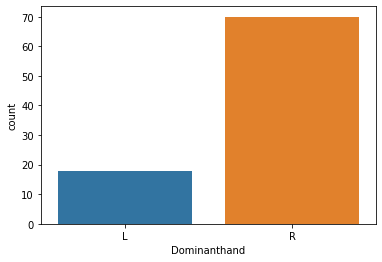

In [37]:
sns.countplot(x="Dominanthand",data=data)

<h5>DISTANCE</h5>

In [38]:
data.Distance.describe()

count    88.000000
mean      6.090909
std       1.974762
min       1.000000
25%       5.000000
50%       6.000000
75%       7.000000
max      11.000000
Name: Distance, dtype: float64

In [39]:
data.Distance.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x17f494b32e0>,
 'caps': [<matplotlib.lines.Line2D at 0x17f494b3a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x17f494a5f70>],
 'medians': [<matplotlib.lines.Line2D at 0x17f494c2160>],
 'fliers': [<matplotlib.lines.Line2D at 0x17f494c24f0>],
 'means': []}

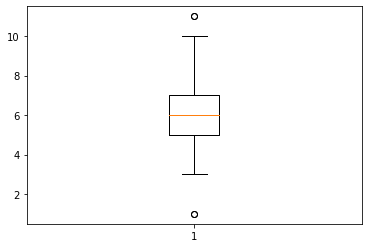

In [40]:
plt.boxplot(data.Distance)

<h5>ROCKET DISTANCE</h5>

In [41]:
data.RocketDistance.describe()

count      88
unique      2
top       Yes
freq       73
Name: RocketDistance, dtype: object

In [42]:
data.RocketDistance.isnull().sum()

0

<AxesSubplot:xlabel='RocketDistance', ylabel='count'>

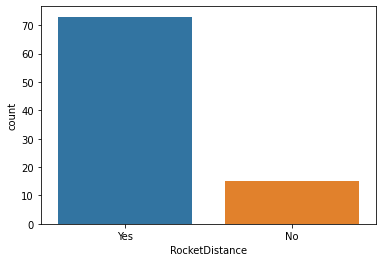

In [43]:
sns.countplot(x="RocketDistance",data=data)

<h5>ASSIGN DUMMIES VALUES</h5>

In [44]:
X=data[["Person","Length","Breadth","PaperQuality","Angle","Foldings","Windspeed","Dominanthand"]]


In [45]:
x=pd.get_dummies(X)

<h3>MIN MAX SCALER</h3>

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(x)

In [47]:
Min_Max_Scaler= pd.DataFrame(scaled_data)


<h2>MODEL SELECTION</h2>

In [48]:
y=data.Distance

In [49]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=10)

<h3>LINEAR REGRESSION</h3>

In [50]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_x,train_y)
Test_score_1=model.score(test_x,test_y)
print("Test Score =",Test_score_1)

Test Score = -0.5894402702327701


<h3>LOGISTICS REGRESSION</h3>

In [51]:
Y=data.RocketDistance

In [52]:
train_x,test_x,train_y,test_y=train_test_split(x,Y,test_size=0.2,random_state=10)

In [53]:
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression()
model_1.fit(train_x,train_y)
Test_score_2=model_1.score(test_x,test_y)
print("Test Score =",Test_score_2)

Test Score = 0.8888888888888888


C:\Users\PRADEEP PRIYA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h3>DECISION TREE CLASSIFIER</h3>

In [54]:
from sklearn.tree import DecisionTreeClassifier
model_2=DecisionTreeClassifier()
model_2.fit(train_x,train_y)
Test_score_3=model_2.score(test_x,test_y)
print("Test Score =",Test_score_3)

Test Score = 0.8333333333333334


<H2>BEST MODEL FOR THIS DATA SET IS :LOGISTICS REGRESSION</H2>